# Epsilon Greedy Reinforcement Learning Algorithms

This lab was created for the IBM Reinforcement Learning meetup to demonstrate Epsilon Greedy Algorithms on a variant of the Multi Arm Bandits or Multi Arm Lever Problem. In this problem you are faced with k levers or actions that you can take and each action will give a reward based on a normal distribution that is fixed. The agent will try different action untill it finds the lever that results in the greatest expected reward.

In this variation we have boxes with balls that have values on it corresponding to the reward gained from picking from that box. With each action you pick a ball from the box based on a binomial distribution. Our agent is trying to find the box that has the highest average reward.

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# this library provides a progress bar
from tqdm import tqdm

In [ ]:
# if the progress bar starts printing a new line run this to fix it
tqdm._instances.clear()

## Box

The Box object represents the box that we will pull balls out of. You need to provide a list of 2 int which represent the values that are in the box. For example Box([0,10]) is a box with balls of value 0 and 10. We will use the binomial distribution to select balls. Do not worry too much about the binomial distribution as it is just a method of randomizing our selection process.

In [ ]:
class Box:
    # creates a single box based on a binomial distribution
    def __init__(self, value):
        # creates the balls in the box
        self.values = value
        # holds the average or true value of the box
        # according to our binomial distribution we select value[0] 90% of the time and value[1] 10% of the time
        self.average = value[0] * .9 + value[1] * .1
    
    # picks a random ball from a box using the binomial distribution
    def step(self):
        reward = self.values[int(np.random.binomial(1, .1, 1))]
        return reward
    
    # string representation of a box
    def __str__(self):
        return str(self.values) + str(self.average)

## Agent

This Agent object represents the decision maker that will pick a box to select a ball from. You need to provide the boxes and the epsilon value indicating how much to explore.

In [ ]:
class Agent:
    # creates a single agents with a list of boxes to chose from and a epsilon value
    def __init__(self, boxes, epsilon):
        # saves the list of boxes
        self.boxes = boxes
        # the agents estimate for each box
        self.estimates = np.zeros(len(boxes))
        # the number of times the agent has selected that box
        self.estimations = np.zeros(len(boxes))
        # list to store the actions
        self.actions = []
        # list to store the rewards the agent recieved
        self.rewards = []
        # epsilon value of the agent
        self.epsilon = epsilon
        
    # give a box an estimate value initial value
    def initial_start(self, box, initial_value):
        self.estimates[box] = initial_value
    
    # create multiple agents given a list of boxes and epsilon values
    @staticmethod
    def create_agents(box, epsilon):
        agents = []
        for e in epsilon:
            agents.append(Agent(box, e))
        return agents
     
    # performs a number of selections given the number of steps
    def step(self, steps=1):
        for step in range(steps):
            # gets a number between 0 and 1 representing a percentage
            random_prob = np.random.random()
            # if the random number is less than epsilon then we chose a random box
            if (random_prob < self.epsilon):
                action = np.random.choice(len(self.boxes))
            # if it is not then we pick the box that has the largest estimate
            else:
                action = np.argmax(self.estimates)
            
            # record the action
            self.actions.append(action)
            
            # gets the reward chosen from the box
            reward = self.boxes[action].step()
            
            # updates the amount of times that box was chosen
            self.estimations[action] += 1
            
            # updates the estimates using an incremental update
            self.estimates[action] = self.estimates[action] + (1/self.estimations[action]) * (reward - self.estimates[action])
            
            # records the reward
            self.rewards.append(reward)
        
        # retuns the list of actions and rewards
        return self.rewards, self.actions
            
    # function to run an experiment comparing agents
    @staticmethod
    def experiment(box, epsilon, number_runs, steps, labels):
        # creates array to record rewards of each agent
        rewards = np.zeros((len(epsilon), steps))
        # runs the experiment a certain number of times
        # we run this multiple times and average because we are dealing with random probability so our result graph would look very erratic if we didnt
        for run in tqdm(range(number_runs)):
            # creates agents given the boxes created before and a list of epsilon values
            agents = Agent.create_agents(box, epsilon)
            # loops through each agent
            for agent_num, agent in enumerate(agents):
                # picks from the boxes a certain amount of times 
                rew, act = agent.step(steps)
                # records the rewards
                rewards[agent_num] = rewards[agent_num] + rew
        
        # averages the rewards
        rewards = rewards/number_runs
        
        # creates graph
        for label, reward in zip(labels, rewards):
            plt.plot(reward,label=label)
        plt.legend()
        plt.show()
    
    # string representation of the box
    def __str__(self):
        representation = ''
        for box in self.boxes:
            representation += 'Box ' + str(box.values) + ' Average ' + str(box.average)+ '\n'
        representation += 'Estimate ' + str(self.estimates)
        return representation

## Experiment

Now we are going to create an experiment comparing epsilon greedy algorithms with different exploration chances. First we start by creating the boxes.

In [ ]:
box1 = Box([0,10])
box2 = Box([4,8])
box3 = Box([5,5])
print('Box1 Average',box1.average)
print('Box2 Average',box2.average)
print('Box3 Average',box3.average)

Now we use the experiment method of the Agent class to run our experiment. We will use agents with epsilon values of 0%, 1%, and 10%. We want each agent to make 2000 selections and we also want to run the experiment 2000 times and average the results. We do this because we are dealing with probability so if we dont average our graph will look erratic.

As you can see below the agent with a 10% exploration rate will increase quicker than any other agent because it is exploring more so in the beginning it can learn more about the boxes and find out which one is best. The agent with 1% exploration will increase slower because it is exploring less, but notice how at some point it intersects the 10% exploration agent and performs better than it. This is because when we have found the best box the 10% agent is picking randomly 10% of the time not the best box compared to the 1% agent. So in the long run the 1% agent proforms slightly better because it always picking the best box 99% of the time compared to 90%. The agent that does not explore at all always picks the box that has the highest estimate so it picked the first box and stuck with it.

As we can see above the agent has found the best box which is box3 with an average of 5 and our average reward in the long run is very close to 5.

100%|██████████| 2000/2000 [02:02<00:00, 16.38it/s]


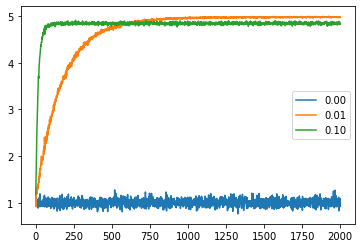

In [5]:
Agent.experiment([box1,box2,box3], [0,.01,.10], 2000, 2000, ['0.00', '0.01','0.10'])

When we run the same experiment averaging over 100 times we can see that the reward graph is erratic and not as clear as when we run 2000 times.

100%|██████████| 100/100 [00:06<00:00, 16.24it/s]


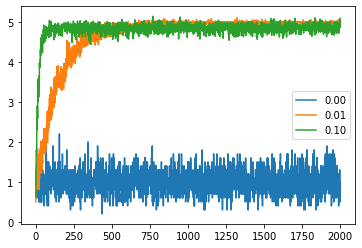

In [19]:
Agent.experiment([box1,box2,box3], [0,.01,.10], 100, 2000, ['0.00', '0.01','0.10'])

Created By: Azim Hirjani